This script is to investigate the relationship between dead time and Si peak fluctuations.

# Imports

In [46]:
from matplotlib import pyplot as plt
import numpy as np
import glob
import xml.etree.ElementTree as et

# Data reading

In [47]:
#this just allows easy folder selection so you don't have to copy the name from the file browser

folders = glob.glob("*_map")
for i in range(0, len(folders)):
    print("{0:>2d} - {1:s} - {2}".format(i, folders[i], len(glob.glob(folders[i]+"/*.spx"))))

 0 - 20230531_CVD_3076_map - 200
 1 - 20230531_CVD_3158_map - 200
 2 - 20230606_CVD_2555_map - 200
 3 - 20230607_CVD_2546_map - 200
 4 - 20230607_CVD_2802_map - 200
 5 - 20230613_CVD_2808_map - 200
 6 - 20230613_CVD_3496_map - 200
 7 - 20230621_CVD_2566_map - 200
 8 - 20230621_CVD_2808_map - 800
 9 - 20230623_CVD_2566_map - 200
10 - 20230626_CVD_2808_map - 800
11 - 20230627_CVD_2546_map - 800
12 - 20230628_CVD_2546_map - 800
13 - 20230711_CVD_2546_map - 800
14 - 20230721_CVD_3158_map - 800


In [48]:
path_label = folders[14][0:-4]

sample_name = "CVD" + path_label[-4:]

In [49]:
file_list = glob.glob(path_label + "_map/*.spx")

#set number of points and dimensions of scan
#grid_size is number of steps in the grid x and y axes
#grid_dim is the actual length of the sides of the square scanned by the grid, in mm

if len(file_list) == 200:
    grid_size = 10
elif len(file_list) == 800:
    grid_size = 20
else:
    raise Exception("found neither 200 nor 800 spx files")

print("{0}x{0} grid".format(grid_size))

#sort files by time taken
def fileListSortKey(s):
    det = int(s.split("_")[-3])
    x = int(s.split("_")[-2])
    #extra splitting necessary because the last element of split("_") is "YY.spx" where y can be either 1 or 2 digits
    y = int(s.split("_")[-1].split(".")[0])
    
    return y + x*20 + det*400

file_list.sort(key=fileListSortKey)

dat = {"realtime": np.zeros(800),
       "livetime": np.zeros(800),
       "si ka":    np.zeros(800),
       "ga ka":    np.zeros(800)}

20x20 grid


In [50]:
for i in range(0, len(file_list)):
    r = et.parse(file_list[i]).getroot()

    #get real time/live time
    dat["realtime"][i] = r.findall("./ClassInstance[@Type='TRTSpectrum']/TRTHeaderedClass/"
                                   "ClassInstance[@Type='TRTSpectrumHardwareHeader']/RealTime")[0].text

    dat["livetime"][i] = r.findall("./ClassInstance[@Type='TRTSpectrum']/TRTHeaderedClass/"
                                   "ClassInstance[@Type='TRTSpectrumHardwareHeader']/LifeTime")[0].text

    dat["si ka"][i] = r.findall("./ClassInstance[@Type='TRTSpectrum']/ClassInstance[@Type='TRTResult']/RoiResults/Atom[.='14']/../Counts")[0].text

    dat["ga ka"][i] = r.findall("./ClassInstance[@Type='TRTSpectrum']/ClassInstance[@Type='TRTResult']/RoiResults/Atom[.='31']/../Counts")[0].text


dat_1 = {"realtime": dat["realtime"][0:grid_size**2],
         "livetime": dat["livetime"][0:grid_size**2],
         "si ka":    dat["si ka"][0:grid_size**2],
         "ga ka":    dat["ga ka"][0:grid_size**2]}

dat_2 = {"realtime": dat["realtime"][grid_size**2:grid_size**2*2],
         "livetime": dat["livetime"][grid_size**2:grid_size**2*2],
         "si ka":    dat["si ka"][grid_size**2:grid_size**2*2],
         "ga ka":    dat["ga ka"][grid_size**2:grid_size**2*2]}

# Plotting

In [51]:
print(np.std(dat_1["si ka"])/np.average(dat_1["si ka"]))
print(np.std(dat_1["ga ka"])/np.average(dat_1["ga ka"]))
print(np.std(dat_1["realtime"])/np.average(dat_1["realtime"]))

0.0037384585317497237
0.009748181119616207
0.0003047402791708975


## Counts vs. time-normalized counts

## counts vs real time
should definitively tell if counts and real time are correlated

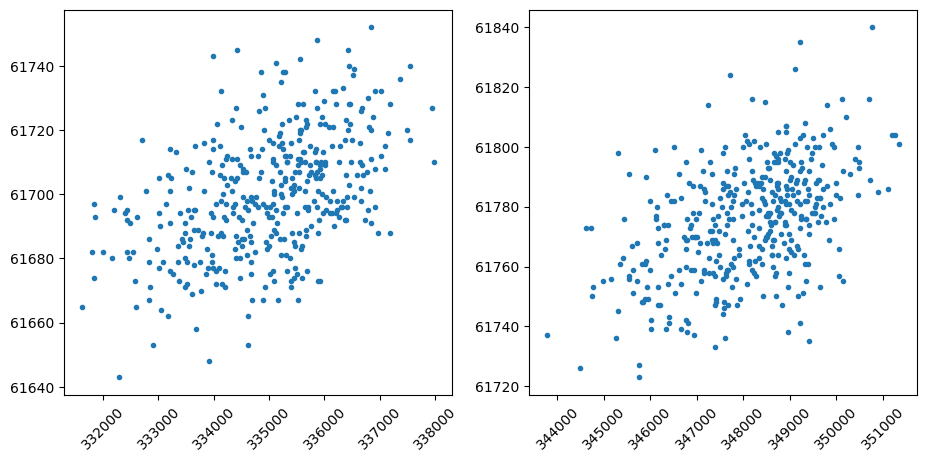

In [52]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

axs[0].plot(dat_1["si ka"], dat_1["realtime"], ".")
axs[1].plot(dat_2["si ka"], dat_2["realtime"], ".")

axs[0].tick_params(axis="x", rotation=45)
axs[1].tick_params(axis="x", rotation=45)

plt.show()

## Counts relative deviation vs real time relative deviation

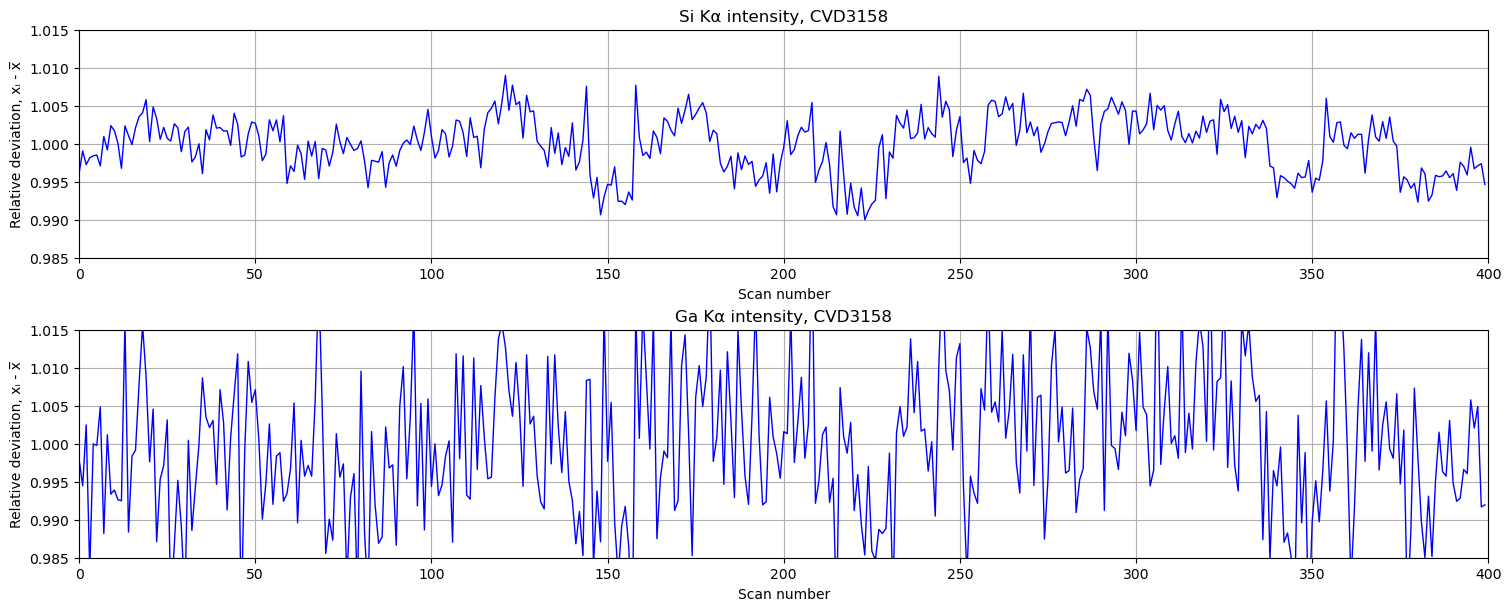

In [53]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), layout="constrained")

axs[0].plot(dat_1["si ka"]/np.average(dat_1["si ka"]), "b-", linewidth=1)
#axs[0].plot(dat_1["realtime"]/np.average(dat_1["realtime"]), "r--", linewidth=1)
axs[0].grid(True)
axs[0].set_xlabel("Scan number")
axs[0].set_ylabel("Relative deviation, x\u1d62 - x\u0305")
axs[0].set_title("Si K\u03b1 intensity, "+sample_name)
axs[0].axis([0, grid_size**2, 0.985, 1.015])

axs[1].plot(dat_1["ga ka"]/np.average(dat_1["ga ka"]), "b-", linewidth=1)
#axs[1].plot(dat_1["realtime"]/np.average(dat_1["realtime"]), "r--", linewidth=1)
axs[1].grid(True)
axs[1].set_xlabel("Scan number")
axs[1].set_ylabel("Relative deviation, x\u1d62 - x\u0305")
axs[1].set_title("Ga K\u03b1 intensity, "+sample_name)
axs[1].axis([0, grid_size**2, 0.985, 1.015])

#axs[1].plot(dat_2["si ka"]/np.average(dat_2["si ka"]), "b-", linewidth=1)
#axs[1].plot(dat_2["realtime"]/np.average(dat_2["realtime"]), "r--", linewidth=1)
#axs[1].grid(True)
#axs[1].set_xlabel("Scan number")
#axs[1].set_ylabel("Relative deviation, x\u1d62 - x\u0305")
#axs[1].set_title("Detector 2")
#axs[1].axis([0, grid_size**2, 0.985, 1.015])

#f.suptitle("Si K\u03b1 intensity, "+sample_name)

plt.show()

In [55]:
sigma_tube = 0.0035*np.average(dat_1["ga ka"])
sigma_poisson = np.sqrt(np.average(dat_1["ga ka"])) #should it be square root of the height of the peak instead of the area?
sigma_total = np.std(dat_1["ga ka"])

print("tube noise: {0}\npoisson noise: {1}\ntotal variation: {2}\nactual thickness var: {3}".format(sigma_tube,
                                                                                                    sigma_poisson,
                                                                                                    sigma_total,
                                                                                                    np.sqrt(sigma_total**2 - sigma_poisson**2 - sigma_tube**2)
                                                                                                    ))

tube noise: 51.9660225
poisson noise: 121.85005129256204
total variation: 144.73548554172885
actual thickness var: 58.31344853916199
